In [1]:
import sys
import numpy as np
import sacc
import yaml
sys.path.insert(1, '/home/jaimerz/Documents/UCL/pacc')
import pacc

In [2]:
s = sacc.Sacc.load_fits("/home/jaimerz/Documents/UCL/3x2_analytical/data/HSC/HSC.sacc")
y = yaml.load(open("/home/jaimerz/Documents/UCL/3x2_analytical/data/HSC/HSC.yml"), Loader=yaml.FullLoader)

In [3]:
cle = pacc.ClsEnsemble(s,y)

In [4]:
wanted_pairs = [['lens_0', 'lens_0'],
                ['lens_1', 'lens_1'],
                ['lens_2', 'lens_2'],
                ['lens_3', 'lens_3']]

In [5]:
scle = 

AttributeError: 'ClsEnsemble' object has no attribute 'cut'

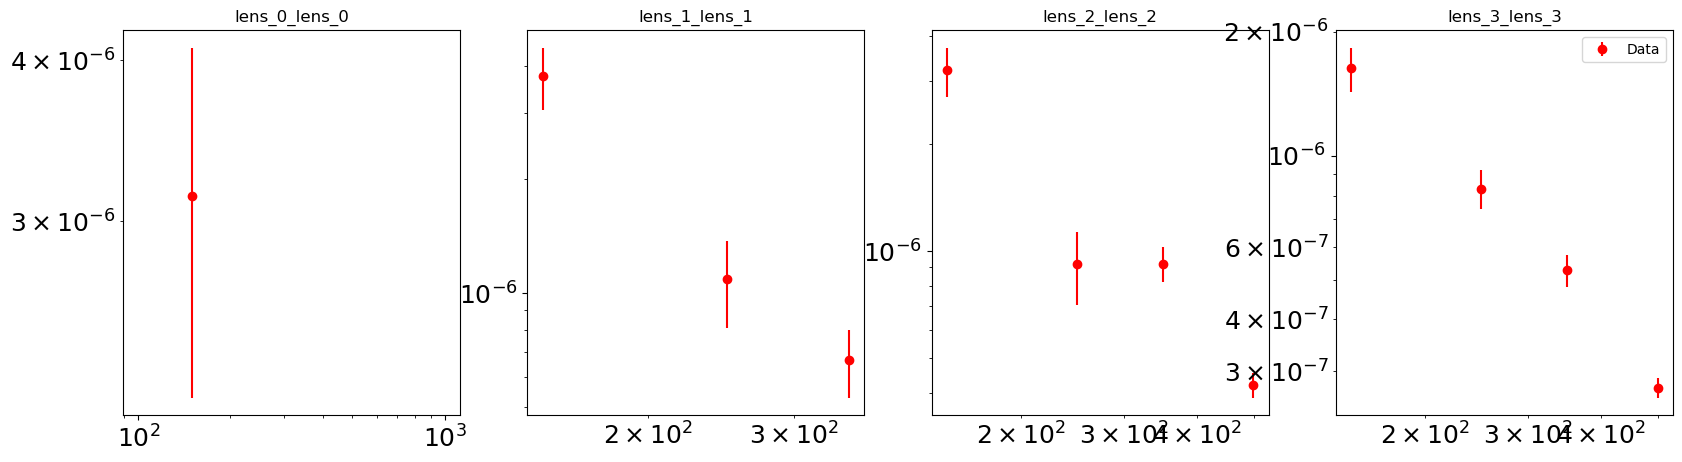

In [6]:
pacc.plot_cls([cle], wanted_pairs)

In [ ]:
pacc.plot_cls([cle, cle], cle.pairs[:10])

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['axes.labelsize'] = 12

In [ ]:
wanted_pairs = [['lens_0', 'lens_0'],
              ['lens_1', 'lens_1'],
              ['lens_2', 'lens_2'], 
              ['lens_3', 'lens_3']]

In [ ]:
A = np.zeros((3,3))
A[1:3,1:3] = np.ones((2,2))
A[0:1, 0:1] = 2
A


In [ ]:
poss = [cle.pairs.index(p) for p in wanted_pairs]
idx = [cle.indices[p] for p in poss]
dims = [len(id) for id in idx]
wanted_idx = []
last = 0
for dim in dims:
    wanted_id = np.arange(last, last+dim)
    last = wanted_id[-1]+1
    wanted_idx.append(wanted_id)
wanted_edges = [id for id in wanted_idx]

In [ ]:
wanted_idx

In [ ]:
total_dims = np.sum(dims)
wanted_cov = np.zeros((total_dims, total_dims))
for i, p1 in enumerate(poss):
    for j, p2 in enumerate(poss):
        idx_i = cle.indices[p1]
        idx_j = cle.indices[p2]
        print(i, j)
        print(idx_i, idx_j)
        cov_block = np.transpose(np.transpose(cle.cov[idx_i])[idx_j])
        print(cov_block)
        print(wanted_idx[i], wanted_idx[j])
        if i < j:
            wanted_cov[wanted_idx[i][:], wanted_idx[j][:]] = cov_block
        else:
            wanted_cov[wanted_idx[i][:], wanted_idx[j][:]] = np.transpose(cov_block)
        print("====")

In [ ]:
proposed_covs = []
for i, pair1 in enumerate(wanted_pairs):
    for j, pair2 in enumerate(wanted_pairs):
        cov = []
        cov.append(pair1)
        cov.append(pair2)
        proposed_covs.append(cov)
proposed_covs

In [ ]:
cle.indices

In [ ]:
t1 = np.transpose(cle.pairs)[0]
t2 = np.transpose(cle.pairs)[1]

In [ ]:
len(cle.pairs)

In [ ]:
ps = [cle.pairs.index(pair) for pair in cle.pairs]
cle.edges[ps]

In [ ]:
cl_names = []
for pair in cle.pairs:
    cl_names.append(pair[0] + ' x ' + pair[1])
cl_names

In [ ]:

plt.figure(figsize = (20,20))
plt.imshow(np.log10(np.abs(cle.cov)))
plt.xticks(cle.edges[:-1], cl_names, rotation=90)
plt.yticks(cle.edges[:-1], cl_names)
plt.show()

In [ ]:
cle.edges

In [ ]:
pl